# Customizing Visualization Design
**Nigel Haim N. Sebastian**

### Visualization Tasks

Create the following visualizations using what we have learned from this module. Be sure to add **titles**, **axis labels**, and **legends** (where needed) to the plots.

#### 1. Heatmap of Correlation Coefficients
Using `seaborn`, create a **heatmap** to visualize the **correlation coefficients** between **earthquake magnitude** and whether there was a tsunami, using the magType of `mb`.

#### 2. Box Plot of Facebook Volume and Closing Prices
Create a **box plot** of **Facebook volume traded** and **closing prices**, and draw **reference lines** for the bounds of a **Tukey fence** with a multiplier of **1.5**. The bounds will be at:
- `Q1 - 1.5 * IQR`
- `Q3 + 1.5 * IQR`

Be sure to use the `quantile()` method on the fb to make this easier. Pick whichever orientation you prefer for the plot, but make sure to use **subplots**.

#### 3. Fill the Area Between Bounds
Fill in the **area between the bounds** from the plot in Task #2. Use `axvspan()` to shade a rectangle from **'2018-07-25' to '2018-07-31'**, which marks the large decline in Facebook price on a **line plot** of the **closing price**.

#### 4. Annotate Events on Facebook Stock Price fb
Using the **Facebook stock price** fb, **annotate** the following events on a **line plot** of the **closing price**:
- Disappointing user growth announced after close on **July 25, 2018**
- Cambridge Analytica story breaks on **March 19, 2018** (when it affected the market)
- FTC launches investigation on **March 20, 2018**

#### 5. Modify the `reg_resid_plots()` Function
Modify the `reg_resid_plots()` function to use a **matplotlib colormap** instead of cycling between two colors. For this use case, we should pick a **qualitative colormap** or create our own.

---

**NOTE:** Submit both the **Python notebook** and **PDF** files.


## Imports

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


## Loading the fbsets

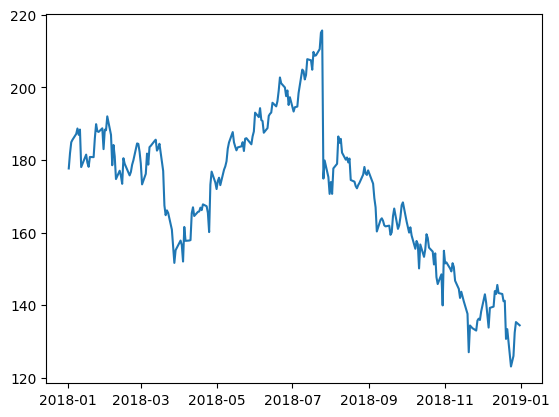

In [2]:
fb = pd.read_csv('Datasets/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
plt.plot(fb.index, fb.open)
plt.show()

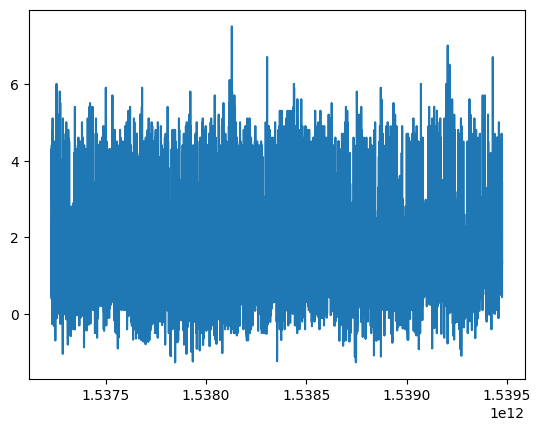

In [3]:
eq = pd.read_csv(
    'Datasets/earthquakes.csv', index_col='time'
)

plt.plot(eq.index, eq.mag)
plt.show()

In [4]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    251 non-null    float64
 1   high    251 non-null    float64
 2   low     251 non-null    float64
 3   close   251 non-null    float64
 4   volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [5]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9332 entries, 1539475168010 to 1537228864470
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mag           9331 non-null   float64
 1   magType       9331 non-null   object 
 2   place         9332 non-null   object 
 3   tsunami       9332 non-null   int64  
 4   parsed_place  9332 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 437.4+ KB


In [6]:
eq.head(5)

,mag,magType,place,tsunami,parsed_place
time,,,,,
1539475168010,1.35,ml,"9km NE of Aguanga, CA",0,California
1539475129610,1.29,ml,"9km NE of Aguanga, CA",0,California
1539475062610,3.42,ml,"8km NE of Aguanga, CA",0,California
1539474978070,0.44,ml,"9km NE of Aguanga, CA",0,California
1539474716050,2.16,md,"10km NW of Avenal, CA",0,California


## Heatmap of Correlation Coefficients

In [7]:
eq['magType'].unique()

array(['ml', 'md', 'mb', 'mww', 'mb_lg', 'mwr', 'mw', 'mh', 'ms_20',
       'mwb', nan], dtype=object)

C:\Users\nigel\AppData\Local\Temp\ipykernel_23912\2160961803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mag_magType['magType'] = mag_magType['magType'].apply(lambda x: 1 if x == 'mb' else 0)


([<matplotlib.axis.YTick at 0x2bf5b9640e0>,
 [Text(0, 0.5, 'tsunami'), Text(0, 1.5, 'magType (mb)')])

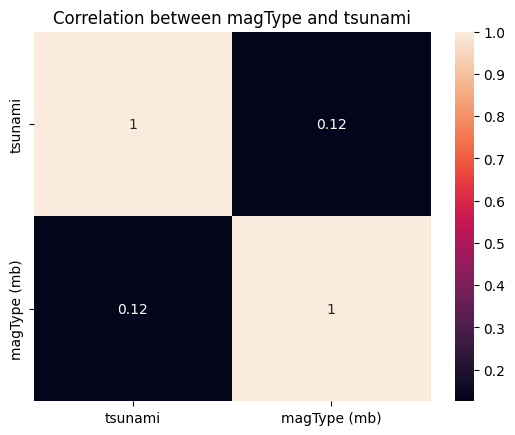

In [8]:
mag_magType = eq[['tsunami', 'magType']]
mag_magType['magType'] = mag_magType['magType'].apply(lambda x: 1 if x == 'mb' else 0)
mag_magType = mag_magType.corr()
sns.heatmap(mag_magType, annot=True)
plt.title('Correlation between magType and tsunami')
plt.xticks(labels=['tsunami', 'magType (mb)'], ticks=[0.5, 1.5])
plt.yticks(labels=['tsunami', 'magType (mb)'], ticks=[0.5, 1.5])


## Box Plot of Facebook Volume and Closing Prices

In [9]:
fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002
2018-12-26,126.00,134.24,125.8900,134.18,39723370
2018-12-27,132.44,134.99,129.6700,134.52,31202509


In [10]:
Q1_volume = fb['volume'].quantile(0.25)
Q3_volume = fb['volume'].quantile(0.75)
IQR_volume = Q3_volume - Q1_volume
lower_bound_volume = Q1_volume - 1.5 * IQR_volume
upper_bound_volume = Q3_volume + 1.5 * IQR_volume

Q1_close = fb['close'].quantile(0.25)
Q3_close = fb['close'].quantile(0.75)
IQR_close = Q3_close - Q1_close
lower_bound_close = Q1_close - 1.5 * IQR_close
upper_bound_close = Q3_close + 1.5 * IQR_close

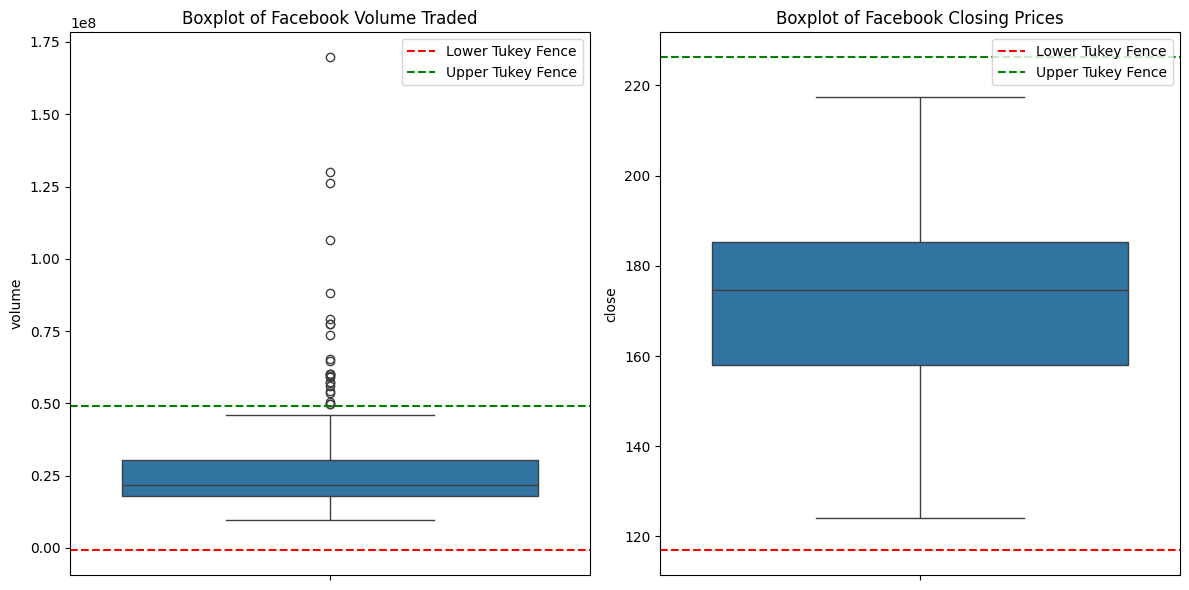

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=fb['volume'])
plt.axhline(y=lower_bound_volume, color='r', linestyle='--', label='Lower Tukey Fence')
plt.axhline(y=upper_bound_volume, color='g', linestyle='--', label='Upper Tukey Fence')
plt.title('Boxplot of Facebook Volume Traded')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(y=fb['close'])
plt.axhline(y=lower_bound_close, color='r', linestyle='--', label='Lower Tukey Fence')
plt.axhline(y=upper_bound_close, color='g', linestyle='--', label='Upper Tukey Fence')
plt.title('Boxplot of Facebook Closing Prices')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


# Annotate Events on Facebook Stock Price fb

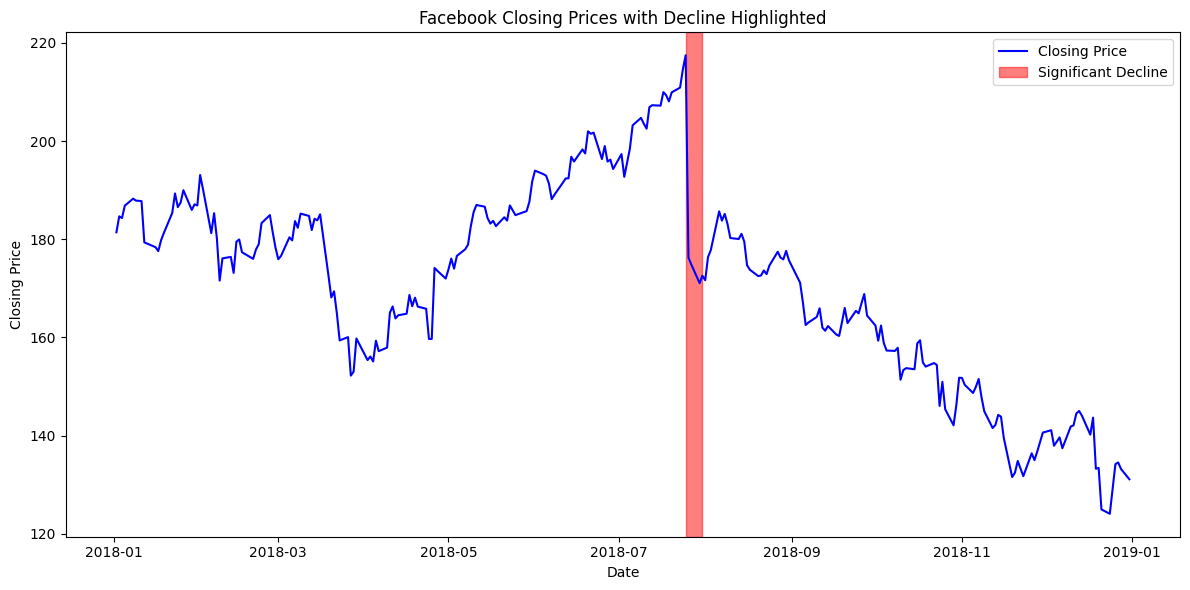

In [12]:
# Line plot of Facebook Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(fb.index, fb['close'], label='Closing Price', color='blue')

# Shading the area between '2018-07-25' and '2018-07-31'
plt.axvspan(pd.to_datetime('2018-07-25'), pd.to_datetime('2018-07-31'), 
            color='red', alpha=0.5, label='Significant Decline')

# Adding titles and labels
plt.title('Facebook Closing Prices with Decline Highlighted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Mean Absolute Error: 2.2962643034581838
R² Score: 0.9772138732720528


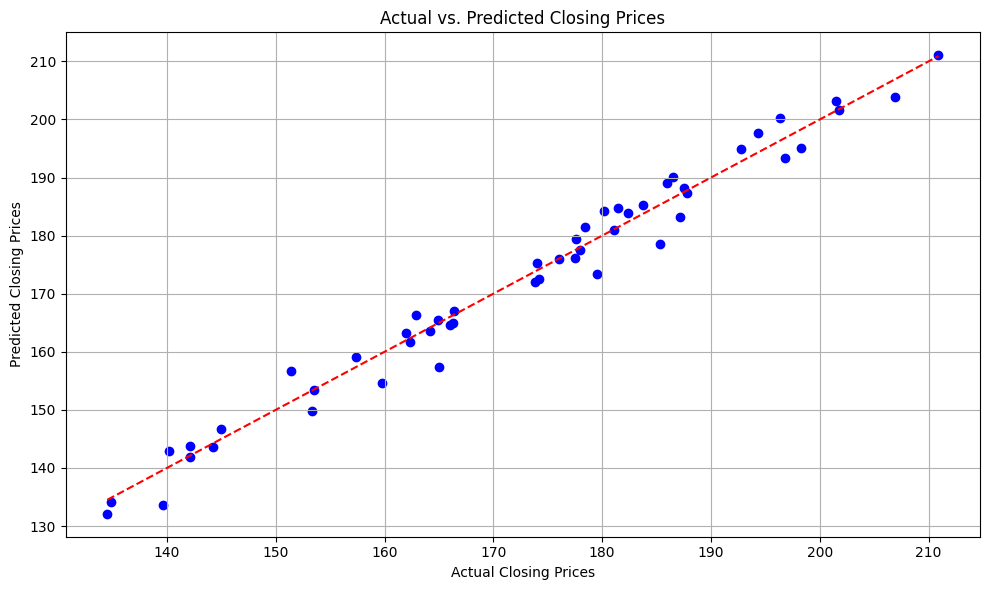

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score



# Define features (X) and target variable (y)
X = fb[['open', 'volume']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Ideal line
plt.title('Actual vs. Predicted Closing Prices')
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.grid()
plt.tight_layout()
plt.show()
